# **Email Spam Classification**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
import re
import string


In [2]:
# Load dataset
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']


## Preprocessing

In [3]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

df['cleaned'] = df['message'].apply(preprocess)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Feature Extraction (TF-IDF)

In [4]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['cleaned']).toarray()
y = df['label'].map({'ham': 0, 'spam': 1})


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  Train Model

In [6]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

## Evaluate Model

In [7]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9766816143497757
Confusion Matrix:
 [[965   0]
 [ 26 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115





###  **Email Spam Classification: Summary**

1. **Import Necessary NLP Tools**

   * Use `NLTK` to handle natural language tasks like removing stopwords and stemming words to their root forms.

2. **Download Stopwords**

   * Download the list of common English stopwords which are words that don’t carry important meaning (e.g., "the", "is", "and").

3. **Text Preprocessing**

   * Clean each email by converting it to lowercase, removing numbers, punctuation, and non-alphabetic characters.
   * Split the cleaned text into individual words.
   * Remove stopwords and apply stemming to reduce words to their root form (e.g., "running" becomes "run").
   * Finally, join the processed words back into a single string of text.

4. **Apply Preprocessing to Dataset**

   * The `preprocess` function is applied to every email message to create a new column of cleaned text.

5. **Feature Extraction Using TF-IDF**

   * TF-IDF (Term Frequency–Inverse Document Frequency) converts text data into numerical feature vectors.
   * It captures the importance of each word in the message relative to the whole dataset.
   * A maximum of 3000 important words (features) is used to represent each message.

6. **Label Encoding**

   * The target variable (`label`) is converted from text to numeric:

     * `"ham"` (not spam) is mapped to `0`
     * `"spam"` is mapped to `1`

7. **Model Selection**

   * A **Multinomial Naive Bayes** model is chosen for classification.
   * This model is effective for text data where input features are counts or frequencies of words.
   * It assumes features (words) are conditionally independent given the class, making it fast and efficient.

8. **Objective**

   * The final goal is to train this model to distinguish between spam and non-spam emails with high accuracy.




# **MNIST Digit Recognition**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


2025-08-03 06:11:40.294999: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754201500.527789      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754201500.597658      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Load Data

Train shape: (60000, 28, 28)


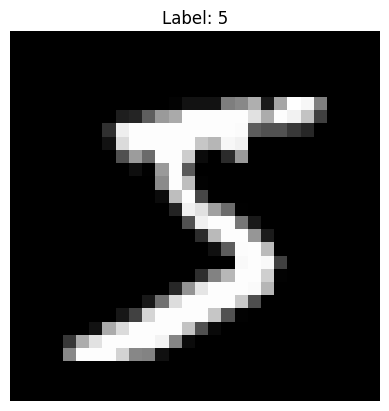

In [13]:
# Load CSV data
train_df = pd.read_csv('/kaggle/input/mnists/mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/mnists/mnist_test.csv')

# Split into features and labels
x_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28)
y_train = train_df.iloc[:, 0].values

x_test = test_df.iloc[:, 1:].values.reshape(-1, 28, 28)
y_test = test_df.iloc[:, 0].values

# Show shape and visualize a sample
print("Train shape:", x_train.shape)
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()


##  Preprocessing for ML

In [14]:
# Flatten images from 28x28 to 784
X = np.concatenate((x_train, x_test)).reshape(-1, 28*28)
y = np.concatenate((y_train, y_test))

# Normalize
X = X / 255.0

# Train-test split
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X, y, test_size=0.2, random_state=42)


## Logistic Regression

In [15]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_ml, y_train_ml)
y_pred_lr = lr.predict(X_test_ml)
print("Logistic Regression Accuracy:", accuracy_score(y_test_ml, y_pred_lr))


Logistic Regression Accuracy: 0.9208571428571428


# SVM

In [16]:
svm = SVC(kernel='rbf')
svm.fit(X_train_ml[:5000], y_train_ml[:5000])  # subset for speed
y_pred_svm = svm.predict(X_test_ml[:1000])
print("SVM Accuracy:", accuracy_score(y_test_ml[:1000], y_pred_svm))


SVM Accuracy: 0.954


## Random Forest

In [17]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_ml, y_train_ml)
y_pred_rf = rf.predict(X_test_ml)
print("Random Forest Accuracy:", accuracy_score(y_test_ml, y_pred_rf))


Random Forest Accuracy: 0.9665714285714285


## Check Models on Test Data Images

/tmp/ipykernel_36/1444905227.py:32: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_36/1444905227.py:32: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


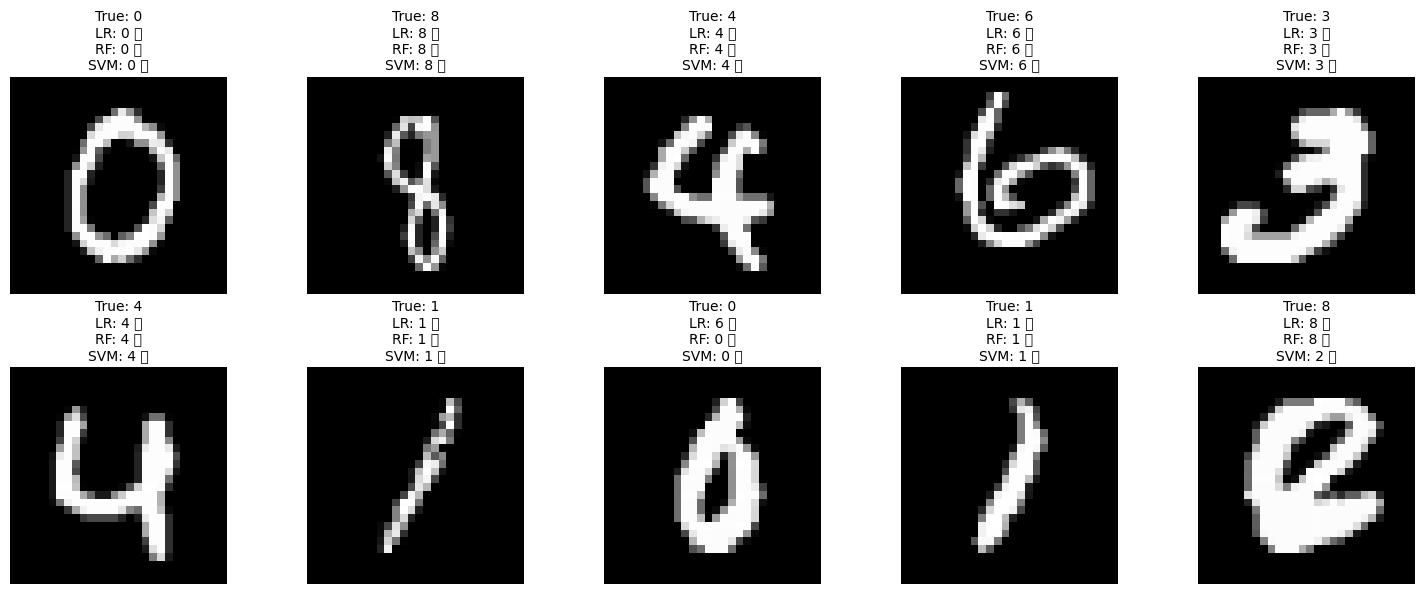

In [24]:
# Flatten and normalize for classical ML
x_test_flat = x_test.reshape(-1, 28*28) / 255.0

# Use first 1000 test samples for all 3 models
subset_size = 1000
x_test_vis = X_test_ml[:subset_size].reshape(-1, 28, 28)
y_test_vis = y_test_ml[:subset_size]
y_pred_lr_vis = y_pred_lr[:subset_size]
y_pred_rf_vis = y_pred_rf[:subset_size]
y_pred_svm_vis = y_pred_svm  # Already predicted only on 1000

# Plot 10 random samples and compare predictions
plt.figure(figsize=(15, 6))
for i in range(10):
    idx = np.random.randint(0, subset_size)
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test_vis[idx], cmap='gray')
    plt.axis('off')
    
    correct_lr = y_test_vis[idx] == y_pred_lr_vis[idx]
    correct_rf = y_test_vis[idx] == y_pred_rf_vis[idx]
    correct_svm = y_test_vis[idx] == y_pred_svm_vis[idx]
    
    title = (
        f"True: {y_test_vis[idx]}\n"
        f"LR: {y_pred_lr_vis[idx]} {'✅' if correct_lr else '❌'}\n"
        f"RF: {y_pred_rf_vis[idx]} {'✅' if correct_rf else '❌'}\n"
        f"SVM: {y_pred_svm_vis[idx]} {'✅' if correct_svm else '❌'}"
    )
    
    plt.title(title, fontsize=10)
plt.tight_layout()
plt.show()
